In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Kanzashi,1941
1,24 Hours,1931
2,Red Mantis,2009
3,Ruby Skye P.I.: The Spam Scam,2010
4,County General,2005


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
t = titles
c = cast

### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
bs = c[(c.character == 'Batman')|(c.character == 'Superman')]

In [7]:
bs.groupby(['year', 'character']).size()

year  character
1938  Batman       1
1940  Batman       1
1943  Batman       1
1948  Superman     1
1949  Batman       2
                  ..
2016  Superman     4
2017  Batman       9
      Superman     5
2018  Batman       4
      Superman     2
Length: 68, dtype: int64

In [8]:
s_year = bs.groupby(['year', 'character']).size().unstack().fillna(0)
s_year['SvsB'] = s_year.Superman - s_year.Batman
s_year['SupermanYear'] = np.where(s_year.SvsB > 0, 1, 0)
s_year.head()

character,Batman,Superman,SvsB,SupermanYear
year,,,,
1938,1.0,0.0,-1.0,0
1940,1.0,0.0,-1.0,0
1943,1.0,0.0,-1.0,0
1948,0.0,1.0,1.0,1
1949,2.0,0.0,-2.0,0


In [9]:
s_year.SupermanYear.sum()

11

In [10]:
# We don't need to do applymap

s_year[s_year.SvsB > 0].shape

(11, 4)

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [8]:
bs = c[(c.character == 'Batman')|(c.character == 'Superman')]

# Do a small test here
(bs.groupby([c.character, c.year]).size()).equals(bs.groupby([bs.character, bs.year]).size())

True

In [11]:
by = bs.groupby([c.character, c.year]).size().unstack(0).fillna(0)
by['By'] = by.Batman - by.Superman
by

character,Batman,Superman,By
year,,,
1938,1.0,0.0,1.0
1940,1.0,0.0,1.0
1943,1.0,0.0,1.0
1948,0.0,1.0,-1.0
1949,2.0,0.0,2.0
1950,0.0,1.0,-1.0
1951,0.0,2.0,-2.0
1953,2.0,0.0,2.0
1954,0.0,5.0,-5.0


In [12]:
by[by.By > 0].shape

(27, 3)

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [23]:
aa = c.groupby([c.type, c.year]).size().unstack(0).fillna(0)

aa = aa.iloc[:len(aa)-1]

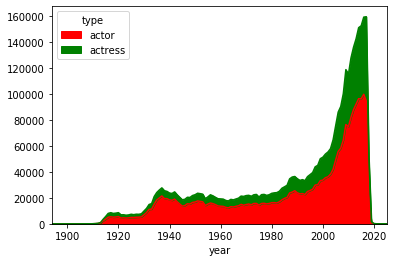

In [38]:
aa.reset_index().plot(x = 'year', y = ['actor', 'actress'], kind = 'area', color = ['red', 'green'])

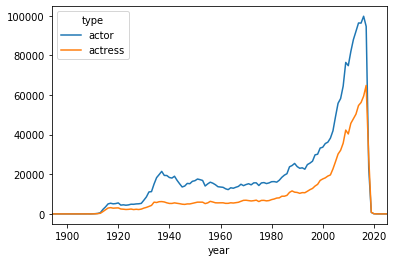

In [26]:
aa.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

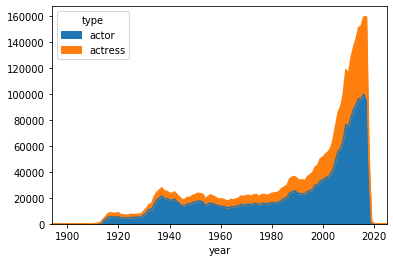

In [18]:
aa = c.groupby([c.type, c.year]).size().unstack(0).fillna(0)
aa = aa.iloc[:len(aa) - 1]
aa.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [23]:
an = c.groupby([c.type, c.year]).size().unstack(0).fillna(0)
an = an.iloc[:len(an) - 1]
an['difference'] = an['actor'] - an['actress'] 
an

type,actor,actress,difference
year,,,
1894,2.0,1.0,1.0
1900,2.0,0.0,2.0
1905,1.0,0.0,1.0
1906,14.0,3.0,11.0
1907,5.0,0.0,5.0
...,...,...,...
2021,14.0,21.0,-7.0
2022,12.0,4.0,8.0
2023,2.0,0.0,2.0


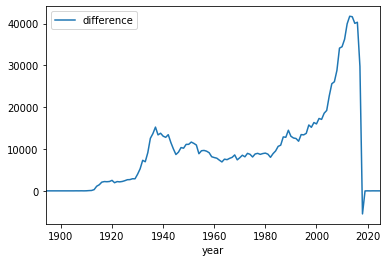

In [24]:
an.reset_index().plot(x = 'year', y = 'difference')

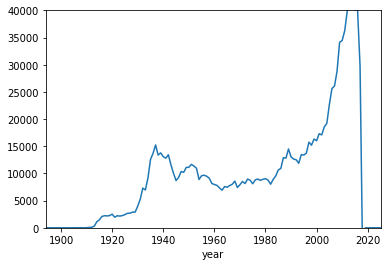

In [29]:
# Using Brandon's method

(an.actor - an.actress).plot(ylim = [0, 40000])

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [11]:
c = c[c.year < 2100]
c.shape

(3786173, 6)

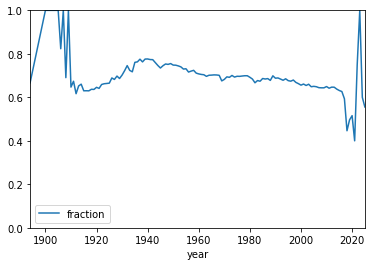

In [12]:
cf = c.groupby(['year', 'type']).size().unstack(1)#.fillna(0)
cf = cf.assign(total = cf.sum(axis = 1)).reset_index()
cf['fraction'] = cf.actor/cf.total

cf.plot(x = 'year', y = 'fraction', ylim = [0,1])

In [16]:
cf

type,year,actor,actress,total,fraction
0,1894,2.0,1.0,3.0,0.666667
1,1900,2.0,0.0,2.0,1.000000
2,1905,1.0,0.0,1.0,1.000000
3,1906,14.0,3.0,17.0,0.823529
4,1907,5.0,0.0,5.0,1.000000
...,...,...,...,...,...
118,2021,14.0,21.0,35.0,0.400000
119,2022,12.0,4.0,16.0,0.750000
120,2023,2.0,0.0,2.0,1.000000
121,2024,9.0,6.0,15.0,0.600000


In [23]:
c.groupby(['year', 'type']).size().unstack(1)

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN
...,...,...
2022,12.0,4.0
2023,2.0,NaN
2024,9.0,6.0


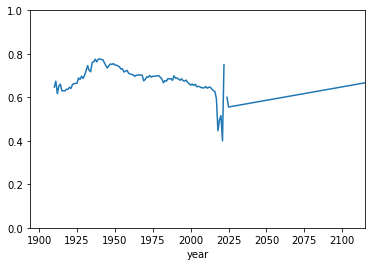

In [15]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

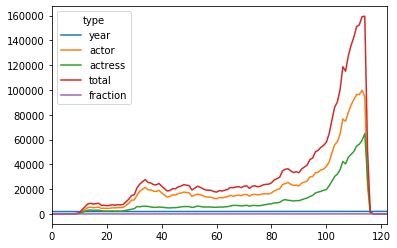

In [13]:
cf.plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

(143720, 6)

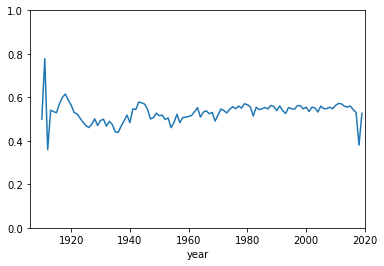

In [20]:
c = cast

ct = c[c.n == 2]
ct.shape

ct = ct.groupby(['year', 'type']).size().unstack()
(ct.actor/(ct.actor + ct.actress)).plot(kind = 'line', ylim = [0, 1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

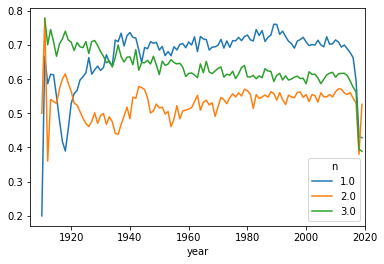

In [13]:
df = c[c.n < 4]
df = df.groupby([df.type, df.year, df.n]).size().unstack(0)
(df.actor/(df.actor + df.actress)).unstack().plot()

In [13]:
o = pd.DataFrame({'order':['a', 'b', 'b', 'c'], 'ex':[300, 500, 200, 600]})
o

pb = pd.DataFrame({'order':['a', 'b', 'c'], 'vol':[200, 400, 700]})
pb

m = pd.merge(o, pb, on = 'order', how = 'left')
m['try'] = m[['ex', 'vol']].min(axis = 1)
m

,order,ex
0,a,300
1,b,500
2,b,200
3,c,600


,order,vol
0,a,200
1,b,400
2,c,700


,order,ex,vol,try
0,a,300,200,200
1,b,500,400,400
2,b,200,400,200
3,c,600,700,600


In [16]:
A = pd.DataFrame({"type":['a','b','c'], "value":[100, 50, 30]})
B = pd.DataFrame({"type": ['a','a','a','a','b','b','b','c','c','c','c','c'], "value": [10,50,45,10,45,10,5,6,6,8,12,10]})

df = pd.merge(B, A, on = 'type')
df 

df['cumsum'] = df.groupby('type')['value_x'].cumsum()
df

,type,value_x,value_y
0,a,10,100
1,a,50,100
2,a,45,100
3,a,10,100
4,b,45,50
5,b,10,50
6,b,5,50
7,c,6,30
8,c,6,30
9,c,8,30


,type,value_x,value_y,cumsum
0,a,10,100,10
1,a,50,100,60
2,a,45,100,105
3,a,10,100,115
4,b,45,50,45
5,b,10,50,55
6,b,5,50,60
7,c,6,30,6
8,c,6,30,12
9,c,8,30,20


In [24]:
B[(df.groupby('type')['cumsum'].shift().fillna(0) < df['value_y'])]#.groupby('type').count()
B[(df.groupby('type')['cumsum'].shift().fillna(0) < df['value_y'])].groupby('type').sum()

,type,value
0,a,10
1,a,50
2,a,45
4,b,45
5,b,10
7,c,6
8,c,6
9,c,8
10,c,12


,value
type,
a,105
b,55
c,32


In [6]:
import pandas as pd

q =pd.DataFrame({'OrderID':['a1', 'a1','a1','a2', 'a3'], 
              'Execution_Size': [20, 75, 500, 200, 1000],
              'Quote_Size': [300, 300, 300, 500, 600] })
q

,OrderID,Execution_Size,Quote_Size
0,a1,20,300
1,a1,75,300
2,a1,500,300
3,a2,200,500
4,a3,1000,600


In [7]:
q.groupby(q.OrderID)['Execution_Size'].transform('sum')

0     595
1     595
2     595
3     200
4    1000
Name: Execution_Size, dtype: int64

In [8]:
# Desired result

d =pd.DataFrame({'OrderID':['a1', 'a1','a1','a2', 'a3'], 
              'Execution_Size': [20, 75, 205, 200, 600],
              'Quote_Size': [300, 300, 300, 500, 600] })
d

,OrderID,Execution_Size,Quote_Size
0,a1,20,300
1,a1,75,300
2,a1,205,300
3,a2,200,500
4,a3,600,600


In [9]:
import pandas as pd

d = {0: {50: 16, 23: 7, 22: 7, 5: 1, 31: 10, 47: 15, 2: 0, 44: 14, 39: 13, 21: 7, 11: 3, 30: 10, 16: 5, 42: 14, 26: 8, 1: 0, 40: 13, 32: 10, 34: 11, 46: 15, 49: 16, 15: 5, 37: 12, 9: 3, 12: 4, 41: 13, 24: 8, 10: 3, 18: 6, 8: 2, 33: 11, 35: 11, 0: 0, 36: 12, 27: 9, 48: 16, 38: 12, 7: 2, 28: 9, 3: 1, 29: 9, 43: 14, 4: 1, 45: 15, 17: 5, 14: 4, 13: 4, 19: 6, 25: 8, 20: 6, 6: 2}, 1: {50: 2, 23: 2, 22: 1, 5: 2, 31: 1, 47: 2, 2: 2, 44: 2, 39: 0, 21: 0, 11: 2, 30: 0, 16: 1, 42: 0, 26: 2, 1: 1, 40: 1, 32: 2, 34: 1, 46: 1, 49: 1, 15: 0, 37: 1, 9: 0, 12: 0, 41: 2, 24: 0, 10: 1, 18: 0, 8: 2, 33: 0, 35: 2, 0: 0, 36: 0, 27: 0, 48: 0, 38: 2, 7: 1, 28: 1, 3: 0, 29: 2, 43: 1, 4: 1, 45: 0, 17: 2, 14: 2, 13: 1, 19: 1, 25: 1, 20: 2, 6: 0}, 2: {50: 32, 23: 32, 22: 32, 5: 32, 31: 32, 47: 32, 2: 32, 44: 33, 39: 46, 21: 64, 11: 97, 30: 97, 16: 97, 42: 99, 26: 99, 1: 99, 40: 99, 32: 100, 34: 100, 46: 100, 49: 101, 15: 101, 37: 101, 9: 101, 12: 102, 41: 103, 24: 103, 10: 103, 18: 103, 8: 104, 33: 105, 35: 105, 0: 106, 36: 108, 27: 109, 48: 109, 38: 110, 7: 110, 28: 111, 3: 111, 29: 111, 43: 111, 4: 111, 45: 111, 17: 112, 14: 112, 13: 114, 19: 116, 25: 116, 20: 121, 6: 122}}
print (pd.DataFrame(d).pivot(0,1,2).applymap(chr).agg(''.join))

1
0    jozefeg@gmail.com
1    congrat to decode
2      happy coding!  
dtype: object


In [1]:
279.3 + 1699*5 

8774.3

In [5]:
48000 - 36750
197 * 2 * 3
11250 - 1182

11250

1182

10068

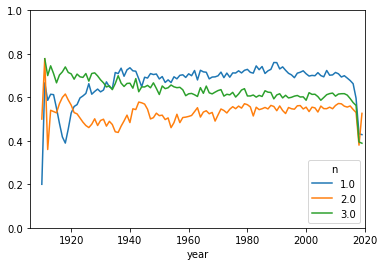

In [22]:
n13 = c[c.n <= 3]

na = n13.groupby([n13.type, n13.year, n13.n]).size().unstack([0])

(na.actor/(na.actor + na.actress)).unstack(-1).plot(ylim = [0,1])

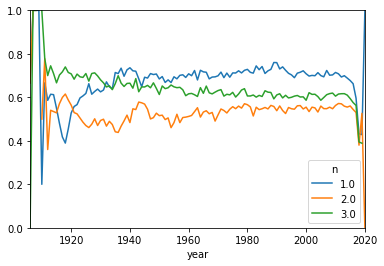

In [19]:
# Brandon's method

c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])